# Tarea 3.1
Encontrar, usando el método de AGs, la raíz real del polinomio P(x) = 5x5- 3x4-x3-5x2-x-3 en el
intervalo [0.5 1], usando números reales, una población de 100 listas, un solo tipo de cruce y
selección por clasificación. Dibuje un cuadro de aptitud contra generación.

Para resolver este ejercicio, se realiza mediante la implementación de AGs.

In [1]:
import math               # Libreria que se usa para realizar operaciones matemáticas y funciones
import random             # Libreria usada para generar números aleatorios
import numpy as np        # Encuentra una raiz real entre 0.5 y 1.5
import matplotlib.pyplot as plt

Para poder evidenciar de mejor modo el desarrollo del ejercicio, se tienen cromosomas de longitud 100 bits, una poblacion de solamente 10 individuos, 200 generaciones, y 1% de mutación. Se tiene una población tan reducida ya que de lo contrario, la obtención del problema sería muy rápida.

In [2]:
longCrom = 100
K = 100
M = 200
pm = 0.01

In [3]:
def ecuacion(x):
    valor = 5*x**5-3*x**4-x**3-5*x**2-x-3
    return valor

In [4]:
def genera(K,longCrom):
    Pob_nueva = np.zeros([K, longCrom], dtype = int)
    cromosoma = np.zeros([longCrom-1], dtype = int)
    j = 0
    while j < K:
        cromosoma = [random.randint(0,1) for i in range(longCrom)]
        Pob_nueva[j] = cromosoma
        j +=1
    return Pob_nueva

In [13]:
def evalua( Pob_nueva):
    Apt_total = 0
    vectorX = np.zeros(K, dtype = float)
    probab = np.zeros(K, dtype = float)
    aptitud = np.zeros(K, dtype = float)
    mejor = 50.
    mejorX = 0.

    i = 0
    while(i < K):
        t,x = res_Funcion(Pob_nueva [i])
        vectorX[i] = x
        aptitud[i] = (10 - abs(t))*100
        i += 1
    Apt_total = float(sum(aptitud))
    probab = 10 * [j/Apt_total for j in aptitud]
    maxprobab = np.amax(probab)
    maxIndex = np.argmax(probab)
    mejorx = vectorX[maxIndex]
    probab[maxIndex] = 0.99
    return probab, vectorX, max(aptitud)

def res_Funcion(cromosoma):
    x = decodificar(cromosoma)
    funcion= ecuacion(x)
    return funcion, x

def decodificar(cromosoma):
    xi = 0.5  # Limite inferior en el dominio real
    xf = 1  # Limite superior en el dominio real
    Max = 2 **(longCrom)
    cromPot = [cromosoma[i]*2**(longCrom-i-1) for i in range(longCrom)]
    valorDecimal = sum(cromPot)
    cromPot = 0
    valDeco = ((xf-xi)/Max)*(valorDecimal)+xi
    return valDeco


In [11]:
def cruce(Pob_nueva, Probabilidad):
    maxprobab = np.amax(prob_cromosoma)
    maxIndex = np.argmax(prob_cromosoma)
    len(Pob_nueva)
    i = 0
    while (i < K-1):
        mejorCrom = Pob_nueva[maxIndex]
        if Probabilidad[i] < 0.97:
            rand = random.randint(2,longCrom-1) # Posición de cruce aleatoria
            padre1 = Pob_nueva[i]
            padre2 = Pob_nueva[i+1]
            j = rand
            while(j < longCrom):
                bit = padre1[j]
                padre1[j] = padre2[j]
                padre2[j] = bit
                j += 1
        else:
            if maxIndex %2 == 0:
                Pob_nueva[i] = Pob_nueva[maxIndex]
            else:
                Pob_nueva[i+1] = Pob_nueva[maxIndex]
        i += 2
    return Pob_nueva

In [14]:
def muta(Pob_nueva, pm):
    totalbits = K * longCrom
    segmento = 1/pm
    n_segmentos = totalbits/segmento
    i =0
    while(i < n_segmentos-1):
        aleatorio = random.randint(0, segmento-1)
        posic = int(i * segmento + aleatorio)
        y = int((posic/longCrom))
        cromosoma = Pob_nueva[y]
        x = posic - longCrom * y
        if (cromosoma[x-1] == 0):
            cromosoma[x-1] = 1
        else:
            cromosoma[x-1] = 0
        i +=1
    return Pob_nueva

In [8]:
def seleccion_ruleta(poblacion, probabilidad):
    chosen = []
    while len(chosen)<= K:
        for n in range(K):
            r = random.random()
            for (i, individuo) in enumerate(poblacion):
                #print(i)
                if i > K:
                    break
                if r <= probabilidad[i]:
                    chosen.append(list(individuo))
                    break
    return chosen

Ya definidas todas las funciones, se realizan las iteraciones para encontrar la mejor solución.

Después de cada generación se imprime la mejor solución. Si hay un resultado de valor menor a 0.00001, se terminan los ciclos y se dice que se llegó a una solución.

Por último, al final se generan gráficas donde se muestran los resultados del error y del valor determinado por el algoritmo.

Generación  0 Mejor x 0.5019583122124329 mejor solucion  -4.919364387662153
Generación  1 Mejor x 0.5000051872124329 mejor solucion  -4.9062846896109535
Generación  2 Mejor x 0.5000049487938538 mejor solucion  -4.906283095175227
Generación  3 Mejor x 0.5000011340965882 mejor solucion  -4.906257584277043
Generación  4 Mejor x 0.5000001804222718 mejor solucion  -4.9062512065740975
Generación  5 Mejor x 0.5000001799566105 mejor solucion  -4.906251203459987
Generación  6 Mejor x 0.500000060747321 mejor solucion  -4.906250406247726
Generación  7 Mejor x 0.5000000598159984 mejor solucion  -4.9062504000195055
Generación  8 Mejor x 0.500000059699583 mejor solucion  -4.906250399240978
Generación  9 Mejor x 0.5000000596923071 mejor solucion  -4.90625039919232
Generación  10 Mejor x 0.5000000596632033 mejor solucion  -4.906250398997688
Generación  11 Mejor x 0.5000000000585585 mejor solucion  -4.90625000039161
Generación  12 Mejor x 0.5000000000003508 mejor solucion  -4.906250000002347
Generación

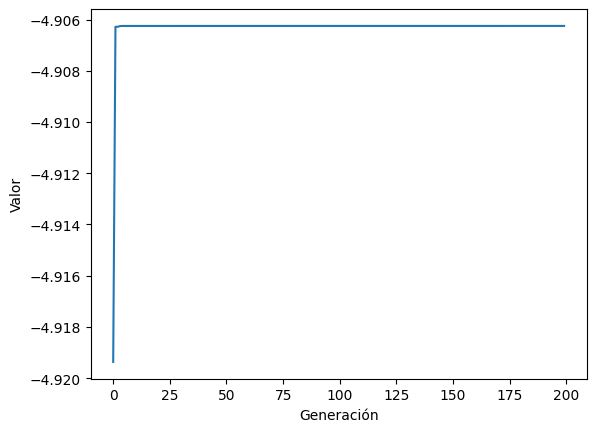

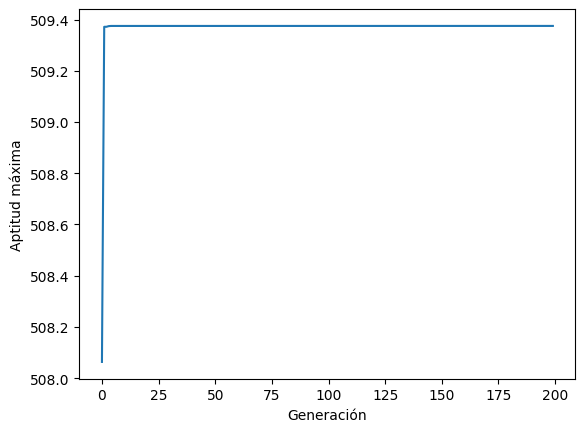

In [15]:
Pob_nueva3 = genera(K,longCrom)
prob_cromosoma,vectorX,AptI = evalua(Pob_nueva3)
i = 0

Px=list()
Py=list()
PaptI=list()
while (i < M):
    Pob_vieja = Pob_nueva3
    Pob_nueva1 = seleccion_ruleta(Pob_vieja, prob_cromosoma)
    Pob_nueva2 = cruce(Pob_nueva1, prob_cromosoma)
    Pob_nueva3 = muta(Pob_nueva2, pm)
    prob_cromosoma, vectorX,AptI = evalua(Pob_nueva3)
    maxprobab = np.amax(prob_cromosoma)
    maxIndex = np.argmax(prob_cromosoma)
    mejorx = vectorX[maxIndex]
    x = mejorx
    val = ecuacion(x)
    print("Generación ", i,"Mejor x", x,"mejor solucion ",val)
    if abs(val) < 0.00001:
        print()
        print("Mejor Solucion x", x," con F(x) = ",val)
        i = M
    Px.append(i)
    Py.append(val)
    PaptI.append(AptI)
    i += 1

plt.plot(Px, Py)
plt.xlabel('Generación')
plt.ylabel('Valor')
plt.show()

plt.plot(Px, PaptI)
plt.xlabel('Generación')
plt.ylabel('Aptitud máxima')
plt.show()